# Regression Model : Estimating CO2 Emissions For New Light Duty Vehicles
<img src = 'http://blogs.cars.com/.a/6a00d83451b3c669e201901d565215970b-800wi'>

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

## `TABLE OF CONTENTS`

* Downloading and Reading 
* Understanding dataset and Overview
* Data Exploration
* Modeling
    1. Simple Linear Regression Model
    2. Multiple Linear Regression Model
* Evaluation
* Conclusion
* Reference

**Importing helper libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### `Downloading Data`

To download the data, we will use !wget to download it from IBM Object Storage.

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-06-11 14:07:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2021-06-11 14:07:21 (1.10 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## `Understanding the Data and Overview`

### `FuelConsumption.csv`:

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB - Mean of FC in city and highway(L/100 km)** e.g. 9.4
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

### Reading the data in

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Let's check the datatype of the columns**

In [4]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

**We can see all columns in df have correct datatype**

**Check the number of rows and columns in df**

In [5]:
df.shape

(1067, 13)

**There are 1067 rows and 13 columns**

**Let's check for any missing data**

In [6]:
missing_data = df.isnull()
for column in missing_data.columns:
    print(column)
    print (missing_data[column].value_counts())
    print("") 

MODELYEAR
False    1067
Name: MODELYEAR, dtype: int64

MAKE
False    1067
Name: MAKE, dtype: int64

MODEL
False    1067
Name: MODEL, dtype: int64

VEHICLECLASS
False    1067
Name: VEHICLECLASS, dtype: int64

ENGINESIZE
False    1067
Name: ENGINESIZE, dtype: int64

CYLINDERS
False    1067
Name: CYLINDERS, dtype: int64

TRANSMISSION
False    1067
Name: TRANSMISSION, dtype: int64

FUELTYPE
False    1067
Name: FUELTYPE, dtype: int64

FUELCONSUMPTION_CITY
False    1067
Name: FUELCONSUMPTION_CITY, dtype: int64

FUELCONSUMPTION_HWY
False    1067
Name: FUELCONSUMPTION_HWY, dtype: int64

FUELCONSUMPTION_COMB
False    1067
Name: FUELCONSUMPTION_COMB, dtype: int64

FUELCONSUMPTION_COMB_MPG
False    1067
Name: FUELCONSUMPTION_COMB_MPG, dtype: int64

CO2EMISSIONS
False    1067
Name: CO2EMISSIONS, dtype: int64



**There is no missing data and we can explore the dataset**

### `Data Exploration`

Let's first have a descriptive exploration on our data.

In [7]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


**Let's select some features to explore more.**

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


**We can plot each of these features:**

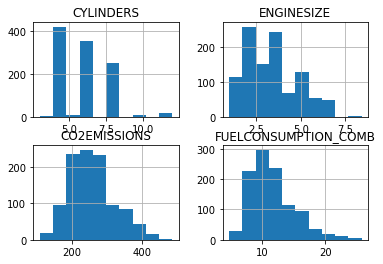

In [9]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

**We can see the variation in number of cars on Y-axis w.r.t. the feature bins on X-axis.**

**Now, let's plot each of these features against the Emission along with best fit line, to see how linear their relationship is:**

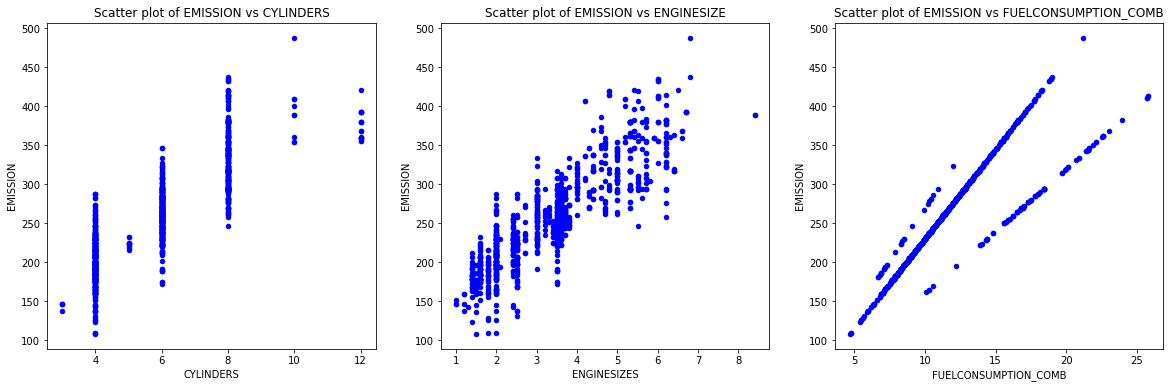

In [10]:
fig = plt.figure() # create figure
ax1 =  fig.add_subplot(131)
ax2 =  fig.add_subplot(132)
ax3 =  fig.add_subplot(133)

# EMISSION vs CYLINDERS
cdf.plot(kind = 'scatter',x = 'CYLINDERS', y = 'CO2EMISSIONS', color = 'blue', ax = ax1, figsize = (20,6))
ax1.set_title('Scatter plot of EMISSION vs CYLINDERS')
ax1.set_xlabel('CYLINDERS')
ax1.set_ylabel('EMISSION')

# EMISSION vs ENGINESIZE
cdf.plot(kind = 'scatter', x = 'ENGINESIZE', y = 'CO2EMISSIONS', color = 'blue', ax = ax2,  figsize = (20,6))
ax2.set_title('Scatter plot of EMISSION vs ENGINESIZE')
ax2.set_xlabel('ENGINESIZES')
ax2.set_ylabel('EMISSION')

# EMISSION vs FUELCONSUMPTION_COMB
cdf.plot(kind = 'scatter', x = 'FUELCONSUMPTION_COMB', y = 'CO2EMISSIONS', color = 'blue', ax = ax3,  figsize = (20,6))
ax3.set_title('Scatter plot of EMISSION vs FUELCONSUMPTION_COMB')
ax3.set_xlabel('FUELCONSUMPTION_COMB')
ax3.set_ylabel('EMISSION')

plt.show()

**We can see that CO2EMISSIONS and 'FUELCONSUMPTION_COMB' is showing high linear relationship  followed by 'ENGINESIZE' and 'CYLINDERS.**

**Let's verify this**

In [11]:
cdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


**We can see in CO2EMISSIONS column that 'FUELCONSUMPTION_COMB' has higher effect on 'CO2EMISSIONS', followed by 'ENGINESIZE' and 'CYLINDERS**

**Let's split our dataset into train and test sets. 30% of the entire dataset will be used for training and 70% for testing. We create a mask to select random rows using np.random.rand() function:**

In [12]:
#msk is a boolean array.
#msk[i] is True if the i-th value randomly generated by np.random.rand is less than (<) 0.3
#msk[i] is False if the i-th value randomly generated by np.random.rand is greater than or equal to (>=) 0.7.
msk = np.random.rand(len(df)) < 0.3

train = cdf[msk]
test = cdf[~msk] # ~msk flips True to False and False to True

# With this set-up expect approximately 30% of cdf to be partitioned into train, 
# and the remaining ~70% to be partitioned into test.

## `MODELING`

**Functions for plotting**

In [13]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title): # red function : actual, Blue Function : predicted
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r")
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", ax=ax1)

    plt.title(Title)
    plt.xlabel('CO2 EMISSIONS (g/100km)')
    plt.ylabel('Probability Density')
    plt.legend([RedName,BlueName])

    plt.show()
    plt.close()

## `1.Simple Regression Model`

**Let's create a Linear Model to predict 'CO2EMMISION' using 'ENGINESIZE', Using sklearn package to model data.**



In [14]:
lr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
lr.fit(train_x, train_y)

# The coefficient and the intercept
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [[41.10479387]]
Intercept:  [119.93835979]


**Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line.**

**We can plot the fit line over the data:**

### `Evaluation`

In [15]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
yhat = lr.predict(test_x) 

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - test_y) ** 2))
print("R2-score: %.2f" % lr.score(test_x , test_y, ))

Mean absolute error: 23.58
Residual sum of squares (MSE): 951.34
R2-score: 0.76


**We can see that our model can explain 77% of the variation in CO2EMMISION.**

**Let's visually see this**

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


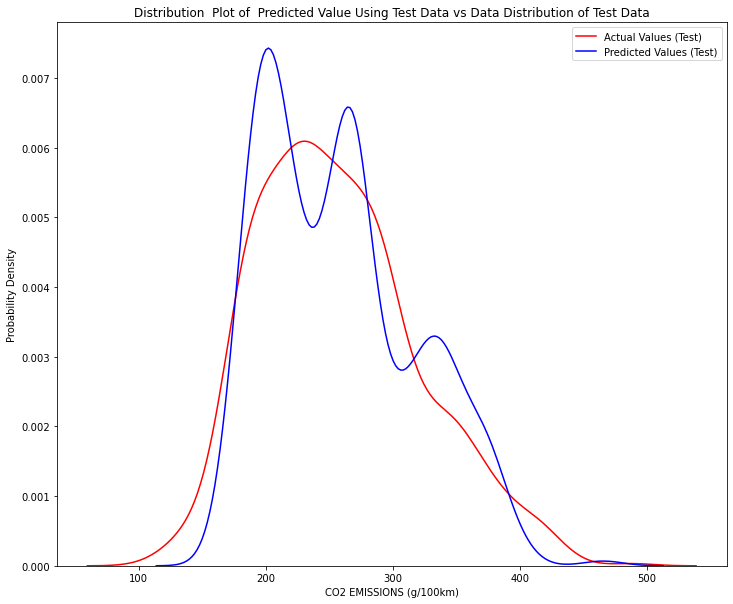

In [16]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(test_y, yhat,"Actual Values (Test)","Predicted Values (Test)",Title)

**As we can see, there is high scope of improvement in the model. Let's use more features to improve it.**

### `2.Multiple Regression Model`
**In reality, there are multiple variables that impact the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features `FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars`. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.**

In [17]:
mlr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
mlr.fit(train_x, train_y)
y_hat = mlr.predict(test_x)

# The coefficients
print ('Coefficients: ', mlr.coef_)
print("Residual sum of squares: %.2f" % np.mean((y_hat - test_y) ** 2))
# Explained variance score: 1 is perfect prediction , also called R^2 score
print('Variance score: %.2f' % mlr.score(test_x, test_y))

Coefficients:  [[12.82801182  5.10375277 10.73164306]]
Residual sum of squares: 563.43
Variance score: 0.86


**Coefficient and Intercept are the parameters of the fitted line. Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem. It tries to minimizes the  mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂  ) over all samples in the dataset. We can see MLR model has less MSE and High R^2 score clsoe to 0.86 which means that this model can explain 86% of the variation in the CO2EMMISION, which is very good accuracy.**

**Let's see it visually**

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


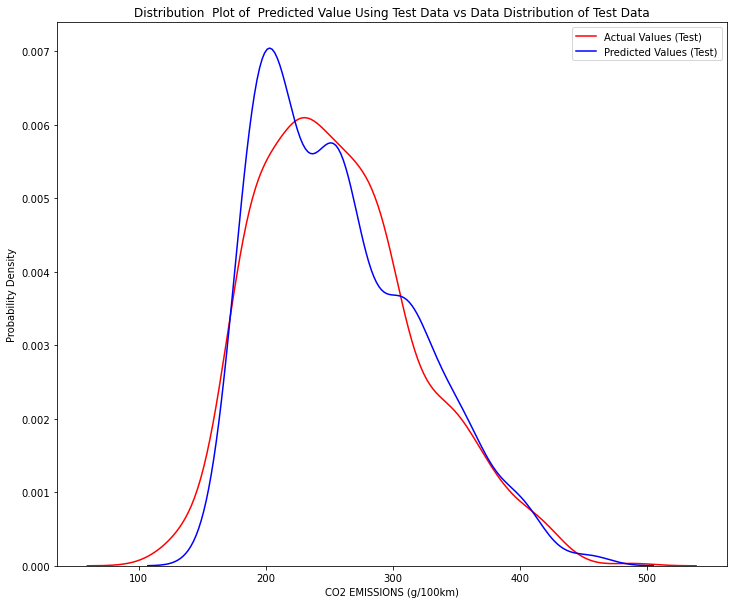

In [18]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(test_y, y_hat,"Actual Values (Test)","Predicted Values (Test)",Title)

**We can see that MLR model is explaining the variation in CO2EMMISION much better than the SLR model. Also if we replace 'FUELCONSUMPTION_COMB' with 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY', we get the same result.**

**Let's estimate the CO2 Emission for the car with Enginesize = 2.4, Cylinders = 4, FuelConsuption_Comb = 9.2**

In [19]:
new_car_param = [[2.4, 4, 9.2]]
new_car_df = pd.DataFrame(new_car_param, columns = ['Enginesize', 'Cylinders', 'FuelConsuption_Comb '])
print('CO2 Emission predicted using MLR:',mlr.predict(new_car_df)[0][0])

CO2 Emission predicted using MLR: 210.33397535573664


## `CONCLUSION`

**We have predicted the CO2 Emission of the car that yet has to be manufactured to be 209.3 g/100km with the accuracy of 86%.**

## `Reference`
* https://www.coursera.org/learn/machine-learning-with-python
* https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

In [20]:
!pip install jovian --upgrade --quiet

In [23]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="estimating-co2-emissions-for-new-light-duty-vehicles")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
